# project : on world happiness report

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# loading the dataset

In [16]:
df = pd.read_csv('world-happiness-report-2021.csv')
print(df.describe())


       Ladder score  Standard error of ladder score  upperwhisker  \
count    149.000000                      149.000000    149.000000   
mean       5.532839                        0.058752      5.648007   
std        1.073924                        0.022001      1.054330   
min        2.523000                        0.026000      2.596000   
25%        4.852000                        0.043000      4.991000   
50%        5.534000                        0.054000      5.625000   
75%        6.255000                        0.070000      6.344000   
max        7.842000                        0.173000      7.904000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.417631               9.432208        0.814745   
std        1.094879               1.158601        0.114889   
min        2.449000               6.635000        0.463000   
25%        4.706000               8.541000        0.750000   
50%   

# Clean up column names (shorter and no spaces)

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()


,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


#  Top 10 Happiest Countries

C:\Users\arthv\AppData\Local\Temp\ipykernel_16284\2009535044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='ladder_score', y='country_name', palette='viridis')


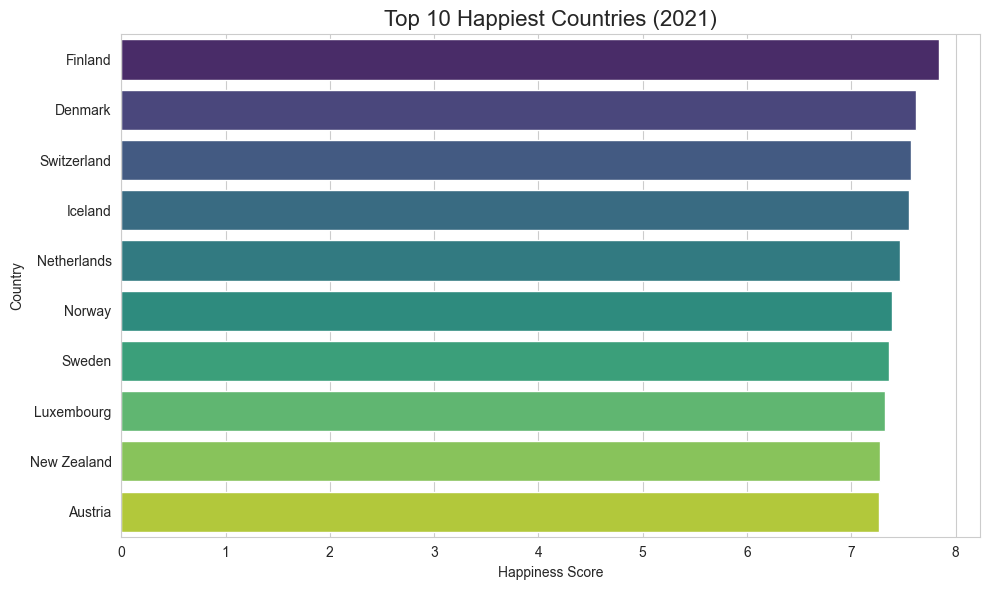

In [27]:
sns.set_style('whitegrid')
top10 = df.nlargest(10, 'ladder_score')

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='ladder_score', y='country_name', palette='viridis')
plt.title('Top 10 Happiest Countries (2021)', fontsize=16)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



# GDP vs. Happiness Score

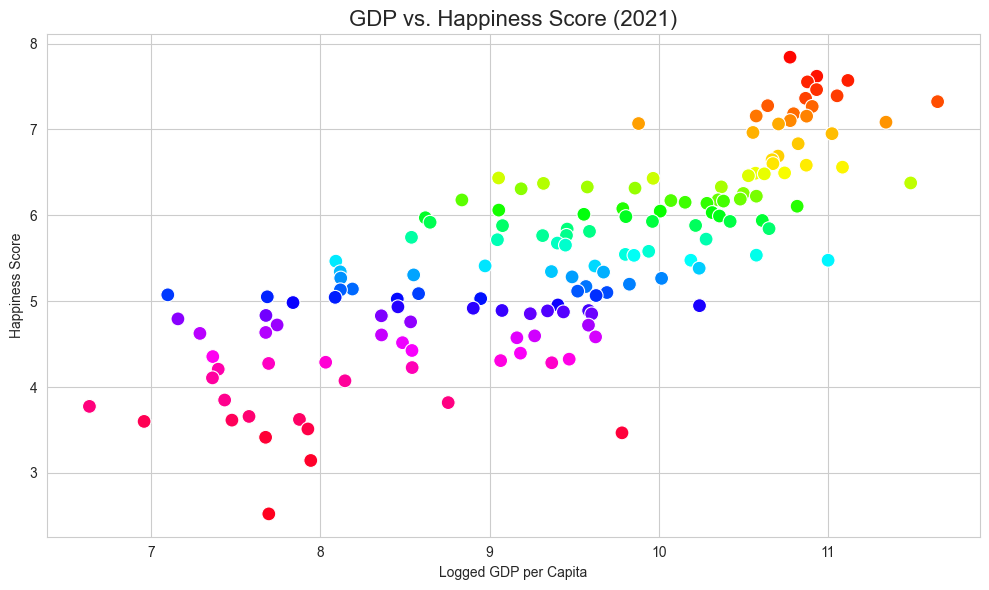

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='logged_gdp_per_capita',
    y='ladder_score',
    hue='country_name',  
    palette='hsv',
    legend=False,
    s=100
)

plt.title('GDP vs. Happiness Score (2021)', fontsize=16)
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap

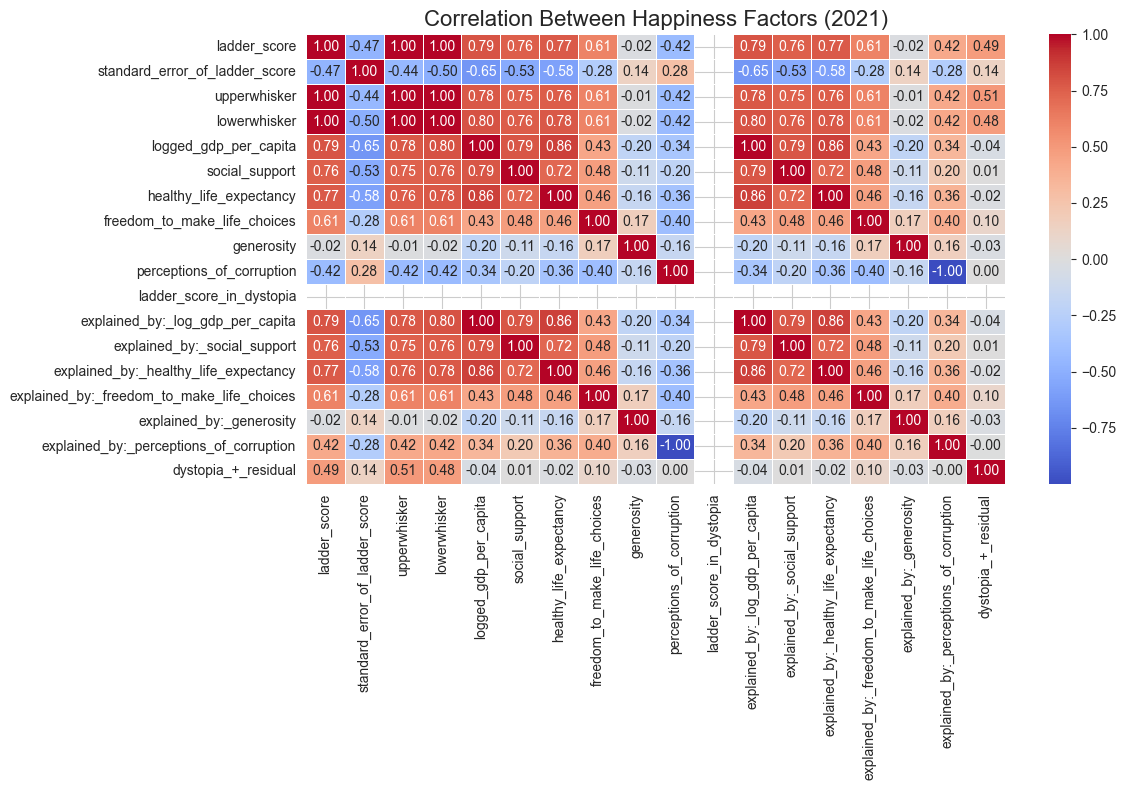

In [32]:
numeric_df = df.select_dtypes(include='number')

correlation = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Happiness Factors (2021)', fontsize=16)
plt.tight_layout()
plt.show()


# Freedom vs. Generosity – Joint Plot

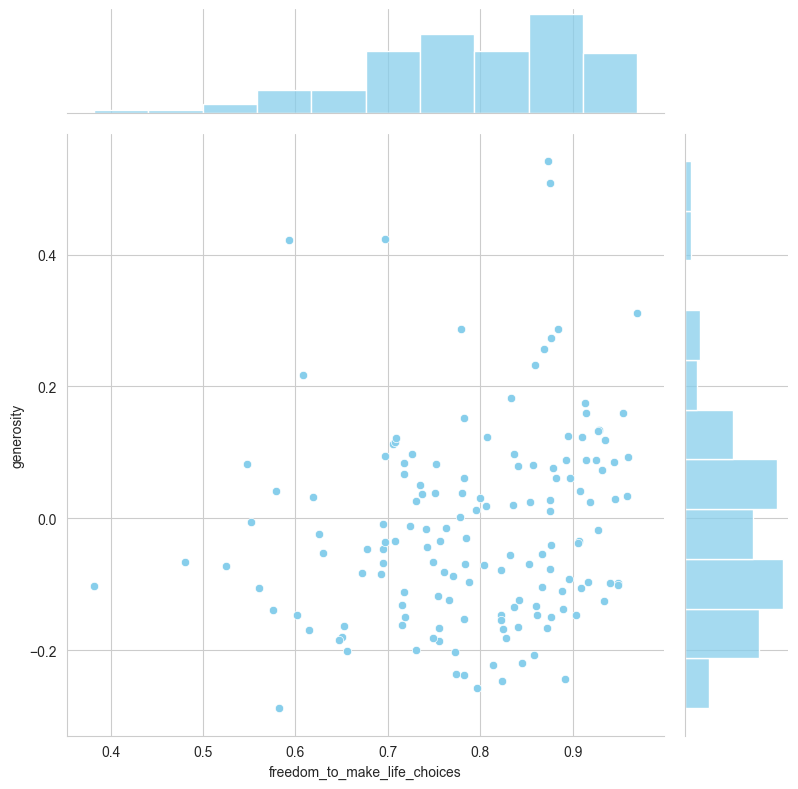

In [34]:
# Scatter + Histograms
sns.jointplot(
    data=df,
    x='freedom_to_make_life_choices',
    y='generosity',
    kind='scatter',
    color='skyblue',
    height=8
)
plt.show()

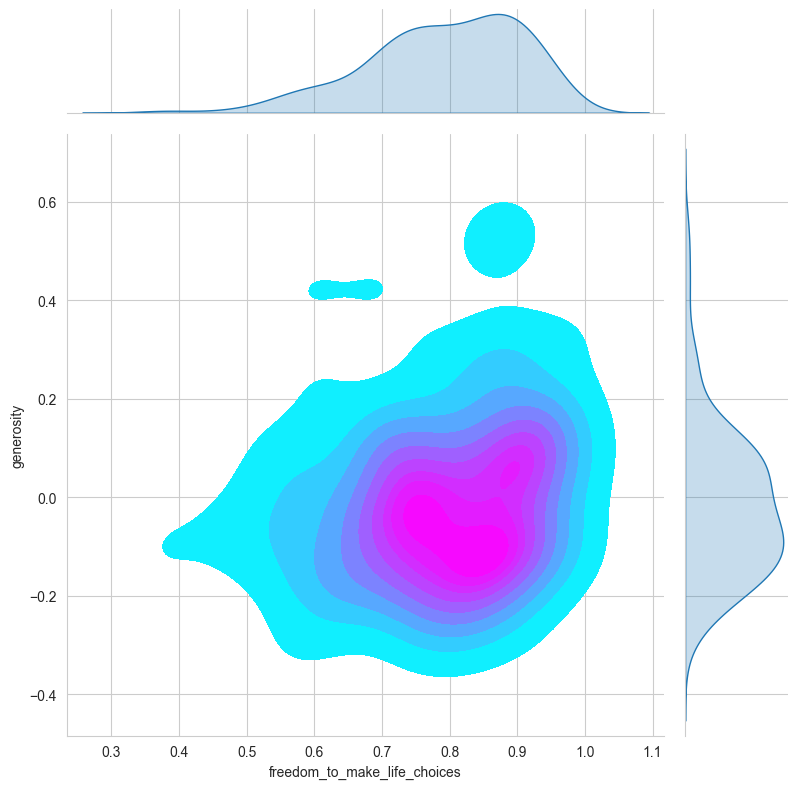

In [35]:
sns.jointplot(
    data=df,
    x='freedom_to_make_life_choices',
    y='generosity',
    kind='kde',
    fill=True,
    cmap='cool',
    height=8
)
plt.show()

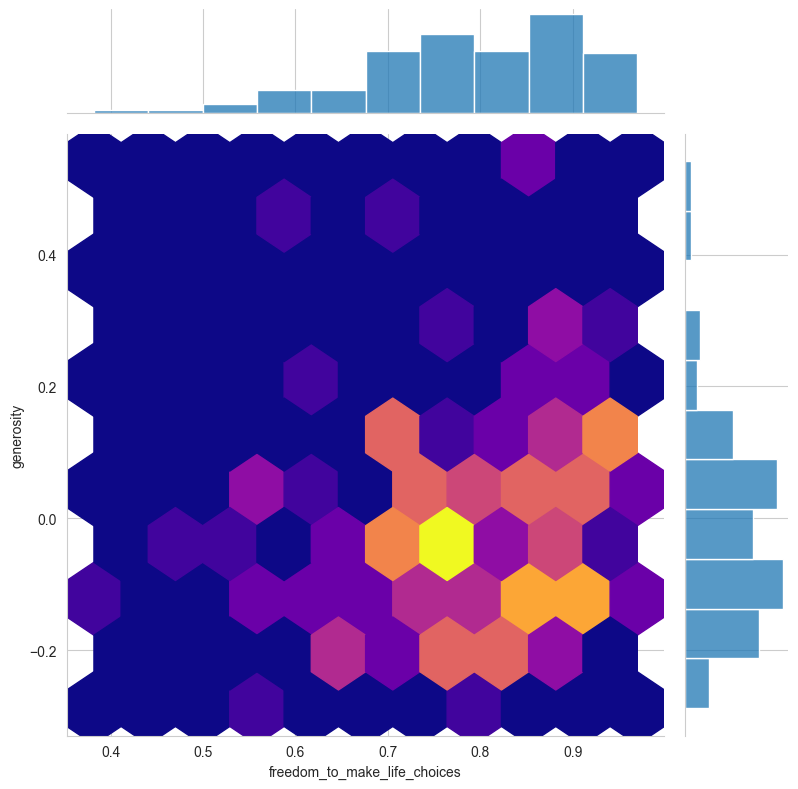

In [36]:
sns.jointplot(
    data=df,
    x='freedom_to_make_life_choices',
    y='generosity',
    kind='hex',
    cmap='plasma',
    height=8
)
plt.show()

# Distribution of Happiness Scores

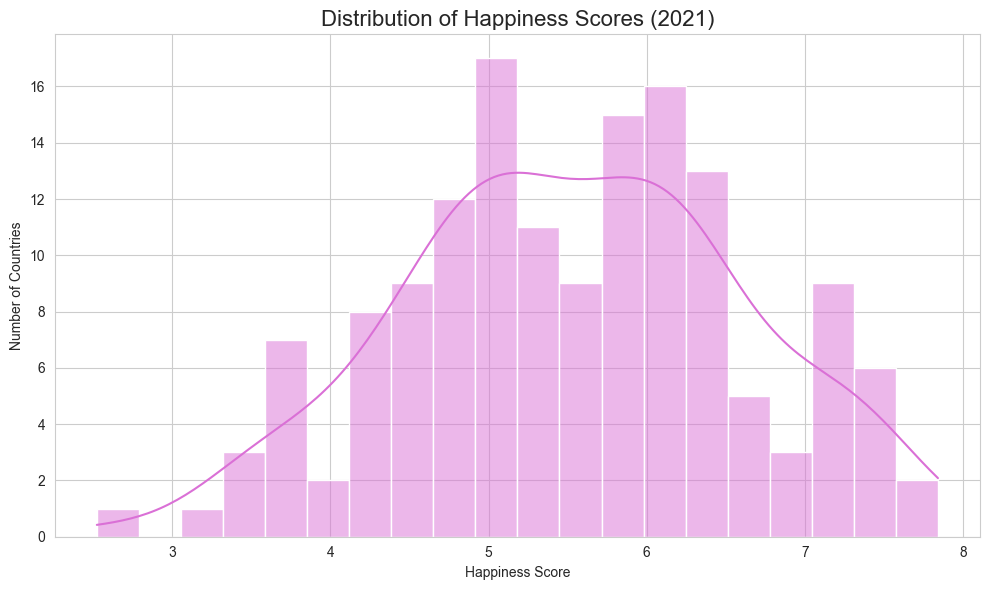

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='ladder_score',
    bins=20,
    kde=True,
    color='orchid'
)

plt.title('Distribution of Happiness Scores (2021)', fontsize=16)
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.tight_layout()
plt.show()